# S12_T01: Aprenentatge Supervisat - Regressions

## Nivell 1

### - Exercici 1: 
Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [1]:
# import of basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data description: https://docs.microsoft.com/en-us/machine-learning-server/r-reference/revoscaler/airlinedata87to08

# import the dataframe:
delay_df = pd.read_csv(r'..\DB\DelayedFlights.csv')

pd.set_option('display.max_columns', None) # show all columns

delay_df.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [2]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

Column description:
1. Year 2008
2. Month 1-12
3. DayofMonth 1-31
4. DayOfWeek 1 (Monday) - 7 (Sunday)
5. DepTime actual departure time (local, hhmm)
6. CRSDepTime scheduled departure time (local, hhmm)
7. ArrTime actual arrival time (local, hhmm)
8. CRSArrTime scheduled arrival time (local, hhmm)
9. UniqueCarrier unique carrier code
10. FlightNum flight number
11. TailNum plane tail number: aircraft registration, unique aircraft identifier
12. ActualElapsedTime in minutes
13. CRSElapsedTime in minutes
14. AirTime in minutes
15. ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
16. DepDelay departure delay, in minutes
17. Origin origin IATA airport code
18. Dest destination IATA airport code
19. Distance in miles
20. TaxiIn taxi in time, in minutes
21. TaxiOut taxi out time in minutes
22. Cancelled *was the flight cancelled
23. CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24. Diverted 1 = yes, 0 = no
25. CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26. WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27. NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
28. SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29. LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

#### First of all, we need to clean a little bit the dataframe

In [3]:
delay_df.columns = [columns.lower() for columns in delay_df] 
delay_df.columns

Index(['unnamed: 0', 'year', 'month', 'dayofmonth', 'dayofweek', 'deptime',
       'crsdeptime', 'arrtime', 'crsarrtime', 'uniquecarrier', 'flightnum',
       'tailnum', 'actualelapsedtime', 'crselapsedtime', 'airtime', 'arrdelay',
       'depdelay', 'origin', 'dest', 'distance', 'taxiin', 'taxiout',
       'cancelled', 'cancellationcode', 'diverted', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [4]:
# Making a copy in case we need the original dataframe, and using a sample to be faster. If we want to use the full dataframe, we have to comment the ".sample(n = 10000, random_state=123)" part.
df = delay_df.copy(deep=True).sample(n = 10000, random_state=123)
df.shape

(10000, 30)

In [5]:
# Drop some columns with no usefull information:
# year: all flight are in 2008
# flightnum: is the way to call a specific flight, so no important information
# tailnum: "plate" of the aircraft
df.drop(['unnamed: 0', 'year', 'flightnum', 'tailnum'], axis=1, inplace=True)
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'actualelapsedtime', 'crselapsedtime',
       'airtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'taxiin', 'taxiout', 'cancelled', 'cancellationcode', 'diverted',
       'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay',
       'lateaircraftdelay'],
      dtype='object')

In [6]:
# Let's create a function to take a look to null values
def null_percent(df):
    null = round(df.isnull().sum() / len(df) * 100,3)
    return null

In [7]:
null_values = null_percent(df)
null_values 

month                 0.00
dayofmonth            0.00
dayofweek             0.00
deptime               0.00
crsdeptime            0.00
arrtime               0.42
crsarrtime            0.00
uniquecarrier         0.00
actualelapsedtime     0.50
crselapsedtime        0.01
airtime               0.50
arrdelay              0.50
depdelay              0.00
origin                0.00
dest                  0.00
distance              0.00
taxiin                0.42
taxiout               0.04
cancelled             0.00
cancellationcode      0.00
diverted              0.00
carrierdelay         35.66
weatherdelay         35.66
nasdelay             35.66
securitydelay        35.66
lateaircraftdelay    35.66
dtype: float64

In [8]:
df.shape

(10000, 26)

In [9]:
df.cancelled.describe()

count    10000.000000
mean         0.000600
std          0.024489
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: cancelled, dtype: float64

In [10]:
# cancelled and cancellationcode: a cancelled flight can't arrive at time or have delay.
# We will delete the cancelled flights (code == 1), and then both columns
df.drop(df[df.cancelled == 1].index, inplace=True)
df.shape

(9994, 26)

In [11]:
df.cancelled.describe()

count    9994.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: cancelled, dtype: float64

In [12]:
# With diverted flights occurs the same: 
df.diverted.sum()

44

In [13]:
df.drop(df[df.diverted == 1].index, inplace=True)
df.diverted.sum()

0

In [14]:
df.drop(['cancelled', 'cancellationcode', 'diverted'], axis=1, inplace=True)
df.columns

Index(['month', 'dayofmonth', 'dayofweek', 'deptime', 'crsdeptime', 'arrtime',
       'crsarrtime', 'uniquecarrier', 'actualelapsedtime', 'crselapsedtime',
       'airtime', 'arrdelay', 'depdelay', 'origin', 'dest', 'distance',
       'taxiin', 'taxiout', 'carrierdelay', 'weatherdelay', 'nasdelay',
       'securitydelay', 'lateaircraftdelay'],
      dtype='object')

In [15]:
# Reset index to avoid further problems
df.reset_index(drop=True, inplace=True)

In [16]:
df.carrierdelay.count()

6434

In [17]:
# We saw a lot of missing values in the last columns (35%):
# 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay','lateaircraftdelay' are used to explain the reason of the delay, 
# but a delay of less than 15 minutes it isn't considered as delay, so this columns have NaN
# We can check that:
print(f'Maximum delay accepted, without consider it as delay: {df[df.weatherdelay.isnull()].arrdelay.max()} minutes')

# We will transform all these NaN to 0:
df.loc[df.arrdelay < 15, ['carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay','lateaircraftdelay']] = 0
print(f'We now have {df.carrierdelay.count()} values in CarrierDelay')


Maximum delay accepted, without consider it as delay: 14.0 minutes
We now have 9950 values in CarrierDelay


In [18]:
null_values = null_percent(df)
null_values

month                0.0
dayofmonth           0.0
dayofweek            0.0
deptime              0.0
crsdeptime           0.0
arrtime              0.0
crsarrtime           0.0
uniquecarrier        0.0
actualelapsedtime    0.0
crselapsedtime       0.0
airtime              0.0
arrdelay             0.0
depdelay             0.0
origin               0.0
dest                 0.0
distance             0.0
taxiin               0.0
taxiout              0.0
carrierdelay         0.0
weatherdelay         0.0
nasdelay             0.0
securitydelay        0.0
lateaircraftdelay    0.0
dtype: float64

In [19]:
shape1 = df.shape
shape1

(9950, 23)

The amount of null values now is very low (less than 1%) so we can drop this rows.
**This was before cleaning the diverted column. Without diverted flights, there is no more NaN**

In [20]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
shape2 = df.shape
print(shape2)
print(f'We have deleted {shape1[0] - shape2[0]} rows from a total of {shape1[0]}, that is {round((shape1[0] - shape2[0])*100/shape1[0],2)}%')

(9950, 23)
We have deleted 0 rows from a total of 9950, that is 0.0%


In [21]:
sns.set_theme(style='darkgrid', palette='dark')
plt.rcParams.update({'font.size': 16, 'figure.figsize': (18, 8)}) # set font and plot size to be larger

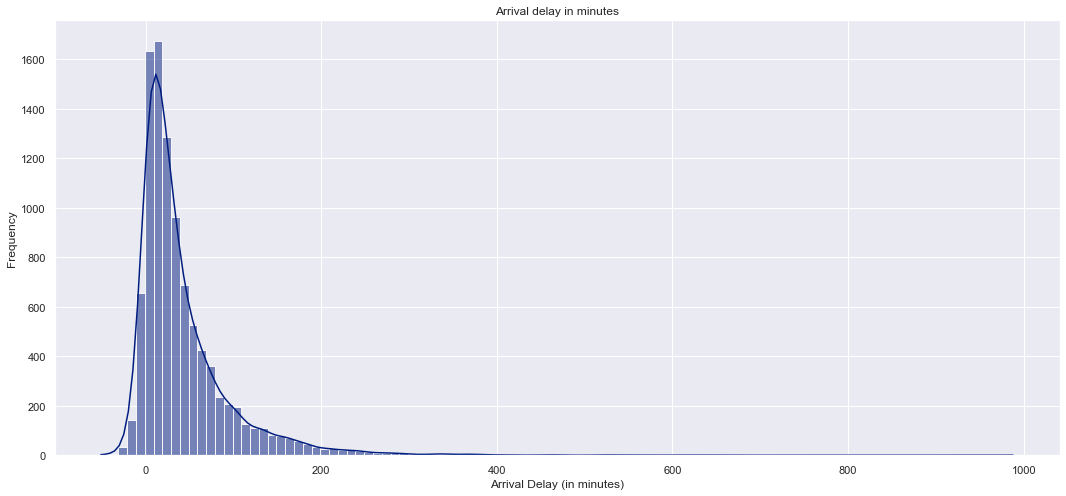

In [22]:
# Let's see the distribution of ArrDelay
fig01 = sns.histplot(df, x = 'arrdelay', binwidth=10, kde = True)
plt.title('Arrival delay in minutes')
plt.ylabel('Frequency')
plt.xlabel('Arrival Delay (in minutes)')
plt.show()
fig01.figure.savefig(r'Plots\Fig01_Distribution_ArrivalDelay.png')


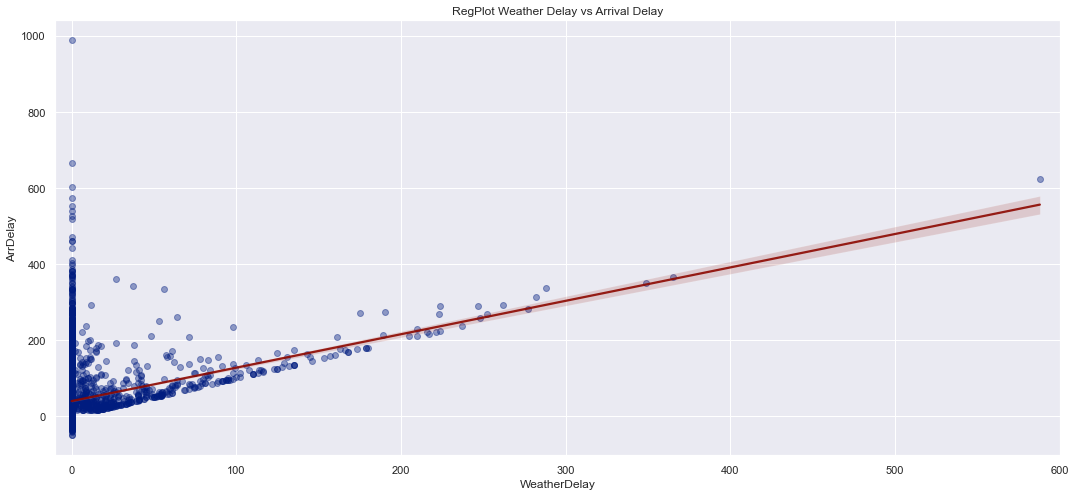

In [23]:
# Lets see the correlation and the regresion line between weather delay and arrival delay, to compare later, when we standarize the data
fig02 = sns.regplot(x = df['weatherdelay'], y = df['arrdelay'], scatter_kws = {"alpha":0.4}, line_kws = {"color":"r","alpha":0.9})
plt.title('RegPlot Weather Delay vs Arrival Delay')
plt.ylabel('ArrDelay')
plt.xlabel('WeatherDelay')
plt.xlim(-10, 600)
plt.show()
fig02.figure.savefig(r'Plots\Fig02_RegPlot_WeatherDelay_vs_ArrivalDelay.png')

In [24]:
# We will split the columns, according to they type (numerical or categorical):
num_cols = df.select_dtypes(include=['float64', 'int']).columns
cat_cols = df.select_dtypes(include='object').columns
print(f'Numerical Columns names: \n{num_cols}')
print(f'Categorical Columns names: \n{cat_cols}')

Numerical Columns names: 
Index(['deptime', 'arrtime', 'actualelapsedtime', 'crselapsedtime', 'airtime',
       'arrdelay', 'depdelay', 'taxiin', 'taxiout', 'carrierdelay',
       'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay'],
      dtype='object')
Categorical Columns names: 
Index(['uniquecarrier', 'origin', 'dest'], dtype='object')


In [25]:
# Before performing any regression, we need to standarize the numerical values. We will use StandardScaler:
from sklearn.preprocessing import StandardScaler

In [26]:
trans = StandardScaler()
df_stand = trans.fit_transform(df[num_cols])
df_stand = pd.DataFrame(df_stand, columns=num_cols)
df_stand.head()

,deptime,arrtime,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,taxiin,taxiout,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,1.354519,-2.901229,0.668201,0.587504,0.740417,-0.429522,-0.578422,-0.348701,-0.073661,-0.179919,-0.140815,-0.162369,-0.038619,-0.259849
1,-0.938596,-0.845884,-1.116484,-0.961585,-1.055003,-0.211875,0.002079,-0.755450,-0.284637,0.482800,-0.140815,-0.343719,-0.038619,-0.461462
2,0.395903,0.256894,0.597937,0.615928,0.755134,-0.302561,-0.307521,-0.755450,-0.354963,-0.345599,-0.140815,-0.343719,-0.038619,0.258587
3,0.017795,0.575638,0.654148,0.502233,0.725701,-0.175601,-0.404272,0.668173,-0.425288,-0.345599,-0.140815,0.744381,-0.038619,-0.403858
4,-0.829612,0.733177,2.719885,2.832973,2.727152,-0.502070,-0.423622,-0.145326,0.629592,-0.345599,-0.140815,-0.343719,-0.038619,-0.461462


In [27]:
df_stand.describe()

,deptime,arrtime,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,taxiin,taxiout,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
count,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03,9.950000e+03
mean,3.992200e-17,1.332184e-16,9.999818e-17,-1.379131e-17,-4.496682e-17,-2.064234e-18,-9.868153e-17,-1.137560e-16,-2.523944e-17,1.341484e-15,6.309526e-16,-1.335225e-16,4.037864e-16,-1.995612e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.378507e+00,-2.959848e+00,-1.650484e+00,-1.558482e+00,-1.452350e+00,-1.680988e+00,-7.138719e-01,-1.365574e+00,-1.198867e+00,-3.455991e-01,-1.408147e-01,-3.437195e-01,-3.861883e-02,-4.614623e-01
25%,-7.072831e-01,-5.454594e-01,-7.511153e-01,-7.484079e-01,-7.312383e-01,-5.927563e-01,-5.977718e-01,-5.520753e-01,-5.659388e-01,-3.455991e-01,-1.408147e-01,-3.437195e-01,-3.861883e-02,-4.614623e-01
50%,5.560595e-02,1.891157e-01,-2.452206e-01,-2.509938e-01,-2.603085e-01,-3.025612e-01,-3.655715e-01,-1.453260e-01,-2.846374e-01,-3.455991e-01,-1.408147e-01,-3.437195e-01,-3.861883e-02,-4.614623e-01
75%,8.429608e-01,7.679828e-01,4.293058e-01,4.453859e-01,4.166531e-01,2.596918e-01,2.149292e-01,2.614233e-01,2.076400e-01,-6.946616e-02,-1.408147e-01,-1.260994e-01,-3.861883e-02,5.697287e-02
max,1.948372e+00,1.434779e+00,5.923885e+00,6.059059e+00,6.170826e+00,1.716356e+01,1.803630e+01,1.571790e+01,1.996906e+01,2.657736e+01,3.344050e+01,1.673946e+01,6.025469e+01,1.108812e+01


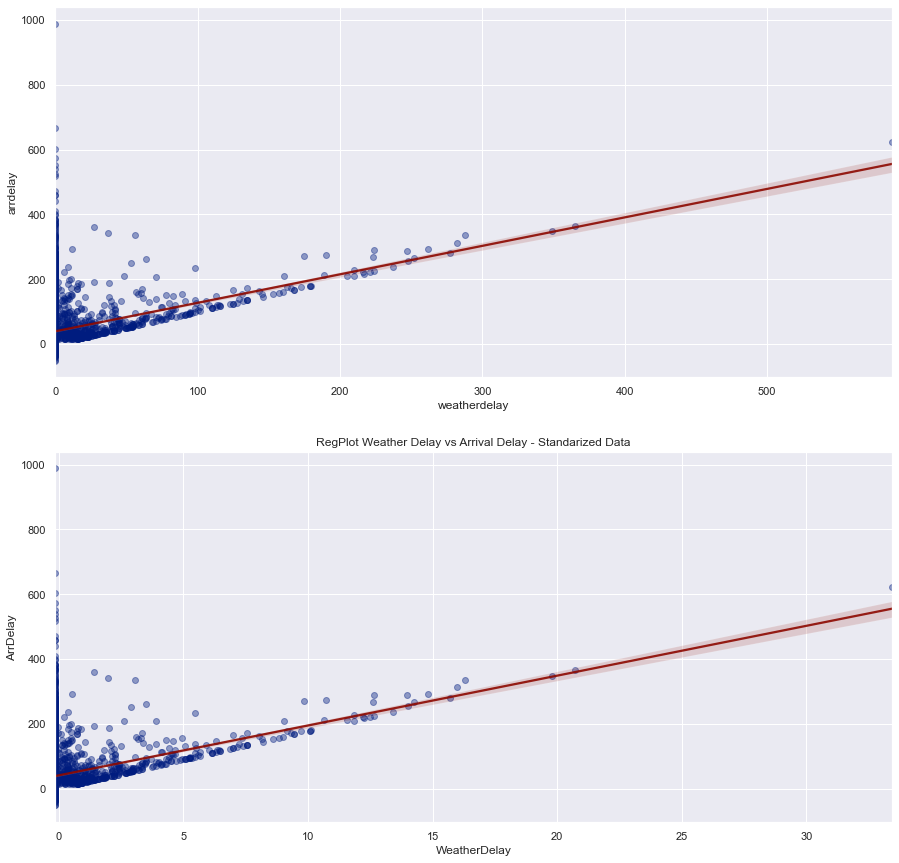

In [28]:
# Lets see the correlation and the regresion line between weather delay and arrival delay, after standarizing the data
fig03, ax3 = plt.subplots(ncols = 1, nrows = 2, figsize = (15,15))

fig02 = sns.regplot(x = df['weatherdelay'], y = df['arrdelay'], scatter_kws = {"alpha":0.4}, line_kws = {"color":"r","alpha":0.9}, ax=ax3[0])
plt.title('RegPlot Weather Delay vs Arrival Delay')
plt.ylabel('ArrDelay')
plt.xlabel('WeatherDelay')

fig04 = sns.regplot(x = df_stand['weatherdelay'], y = df['arrdelay'], scatter_kws = {"alpha":0.4}, line_kws = {"color":"r","alpha":0.9}, ax=ax3[1])
plt.title('RegPlot Weather Delay vs Arrival Delay - Standarized Data')
plt.ylabel('ArrDelay')
plt.xlabel('WeatherDelay')
fig04.figure.savefig(r'Plots\Fig04_RegPlot_WeatherDelay_vs_ArrivalDelay_StandarizedData.png')
plt.show()

fig03.savefig(r'Plots\Fig03_Comparison_normal_and_standarized_data.png')

We can observe there is no differences between the normal data and the standarized. Let's split in train and test, and do the regression.

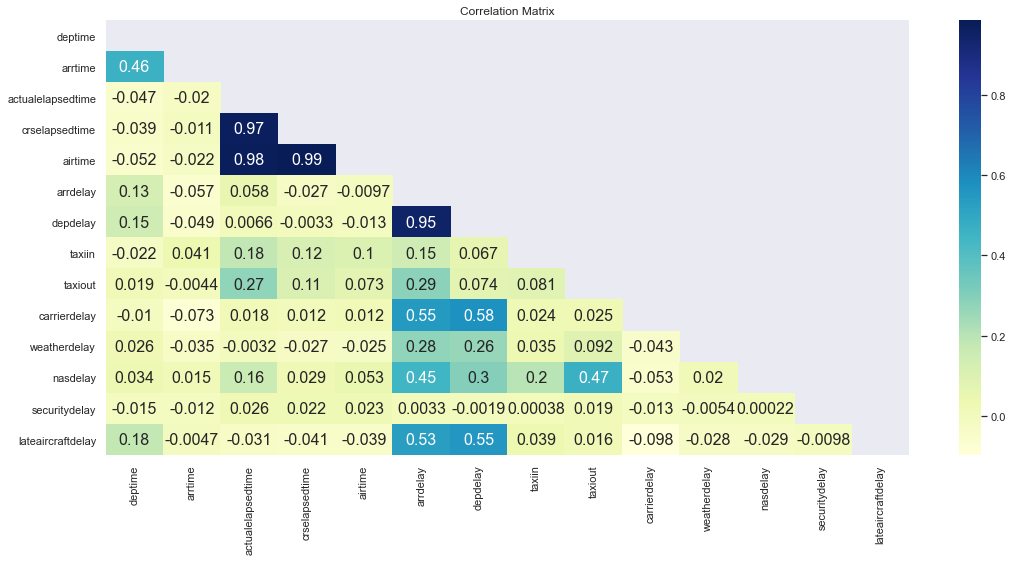

In [29]:
df_corr = df_stand.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True # This mask is to create the half matrix
fig05 = sns.heatmap(df_corr, annot=True, cmap = "YlGnBu", mask = mask)
plt.title('Correlation Matrix')
plt.show()
fig05.figure.savefig(r'Plots\Fig05_CorrelationMatrix.png')

- We can see that the biggest correlation with the arrival delay is the departure delay. But we will use the nexts with more correlation: **taxiout, carrierdelay, weatherdelay, nasdelay and lateaircraftdelay**

In [30]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [31]:
# We define the target as "y" (ArrDelay), and the variables we think the most important as "X" (we keep "securitydelay" to check if it is important or not)
X = df_stand[['taxiout', 'carrierdelay', 'weatherdelay', 'nasdelay', 'securitydelay', 'lateaircraftdelay']]
y = df_stand['arrdelay']

# We add a constant: we are avoiding to force the model to go through the origin
X = sm.add_constant(X)

# We divide into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 123)
X_train.head()


,const,taxiout,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
640,1.0,-0.636264,-0.345599,-0.140815,-0.343719,-0.038619,-0.461462
6868,1.0,-0.917565,-0.345599,-0.140815,2.195182,-0.038619,0.719418
2333,1.0,0.207640,1.035066,-0.140815,-0.343719,-0.038619,-0.461462
7593,1.0,-0.354963,-0.345599,-0.140815,-0.343719,-0.038619,-0.461462
6760,1.0,-0.143987,-0.345599,-0.140815,-0.343719,-0.038619,-0.461462


In [32]:
y_train.head()

640    -0.737854
6868    1.257238
2333    0.150869
7593   -0.683442
6760   -0.683442
Name: arrdelay, dtype: float64

In [33]:
model = sm.OLS(y_train, X_train).fit()
OLSpredictions = model.predict(X_test) # make the predictions by the model

# let's save the MSE and RMSE, and the R-Squared value, to compare later
mseOLS = mean_squared_error(y_test, OLSpredictions)
rmseOLS = mean_squared_error(y_test, OLSpredictions, squared=False)

OLSRsquared = model.rsquared

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               arrdelay   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.392e+05
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:43:41   Log-Likelihood:                 7222.4
No. Observations:                7462   AIC:                        -1.443e+04
Df Residuals:                    7455   BIC:                        -1.438e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0007      0.001     -0.663      0.508      -0.003       0.001
taxiout               0.0014      0.001      1.121      0.262      -0.001       0.004
carrierdelay          0.6476      0.001    586.132      0.000       0.645       0.650
weatherdelay          0.3136      0.001    273.522      0.000       0.311       0.316
nasdelay              0.4917      0.001    400.726      0.000       0.489       0.494
securitydelay         0.0192      0.001     20.074      0.000       0.017       0.021
lateaircraftdelay     0.6188      0.001    573.298      0.000       0.617       0.621
==============================================================================
Omnibus:                     2463.785   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35003.643
Skew:                          -1.184   Prob(JB):                         0.00
Kurtosis:                      13.343   Cond. No.                         1.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the Ordinary Least Square analysis we can see we have an almost 1 R-squared, meanning that we can explain the variance of 99,1% of the data. We can also observe that the constant it can be considered as 0: it's seems reasonable due to the flights they have no delay (or delay = 0).
- The function of the regresion line is composed by the constant (-0.0007) and the coefficients of each feature (0.0014 taxiout, 0,6476 carrierdelay, and so on)

We will see how it looks removing the taxiout and security variables: we think they don't contribute too much to the model

In [34]:
X2 = df_stand[['carrierdelay', 'weatherdelay', 'nasdelay', 'lateaircraftdelay']]
y2 = df_stand['arrdelay']

# We add a constant: we are avoiding to force the model to go through the origin
X2 = sm.add_constant(X2)

# We divide into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.75, random_state = 123)

model2 = sm.OLS(y2_train, X2_train).fit()
OLSpredictions2 = model2.predict(X2_test) # make the predictions by the model

mseOLS2 = mean_squared_error(y_test, OLSpredictions2)
rmseOLS2 = mean_squared_error(y_test, OLSpredictions2, squared=False)

OLS2Rsquared = model2.rsquared

# Print out the statistics
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               arrdelay   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.980e+05
Date:                Wed, 27 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:43:42   Log-Likelihood:                 7024.7
No. Observations:                7462   AIC:                        -1.404e+04
Df Residuals:                    7457   BIC:                        -1.400e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0006      0.001     -0.543      0.587      -0.003       0.002
carrierdelay          0.6474      0.001    571.760      0.000       0.645       0.650
weatherdelay          0.3135      0.001    267.609      0.000       0.311       0.316
nasdelay              0.4923      0.001    443.828      0.000       0.490       0.494
lateaircraftdelay     0.6187      0.001    558.791      0.000       0.616       0.621
==============================================================================
Omnibus:                     2019.560   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63697.923
Skew:                          -0.654   Prob(JB):                         0.00
Kurtosis:                      17.253   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we were assuming before, taxiout and securitydelay don't contribute to the model: we have now an R-squared of 99,1%, the same as before!

In [35]:
# Let's do the same with sklearn:
from sklearn import linear_model

In [36]:
lm = linear_model.LinearRegression()
model3 = lm.fit(X2_train,y2_train) # We fit the model
SKLRsquared = lm.score(X2_train,y2_train) # ??

In [37]:
SKLpredictions = lm.predict(X2_test)
print(SKLpredictions)

mseSKL = mean_squared_error(y_test, SKLpredictions)
rmseSKL = mean_squared_error(y_test, SKLpredictions, squared=False)

[-0.25990395  0.00942402 -0.72318104 ... -0.72318104 -0.00992854
  1.04653922]


In [38]:
comparison_df = pd.DataFrame({"y_test":y2_test,"OLSpredictions":OLSpredictions, "OLSpredictions2":OLSpredictions2, "SKLpredictions":SKLpredictions})
comparison_df.sort_index(inplace=True)
comparison_df

,y_test,OLSpredictions,OLSpredictions2,SKLpredictions
3,-0.175601,-0.153939,-0.151846,-0.151846
4,-0.502070,-0.723119,-0.723181,-0.723181
6,-0.284424,-0.258776,-0.258947,-0.258947
7,-0.792265,-0.724490,-0.723181,-0.723181
10,-0.356973,-0.330774,-0.329910,-0.329910
...,...,...,...,...
9923,-0.683442,-0.725273,-0.723181,-0.723181
9928,-0.465796,-0.439696,-0.438087,-0.438087
9929,0.531750,0.542420,0.544891,0.544891
9930,-0.230012,-0.206735,-0.205339,-0.205339


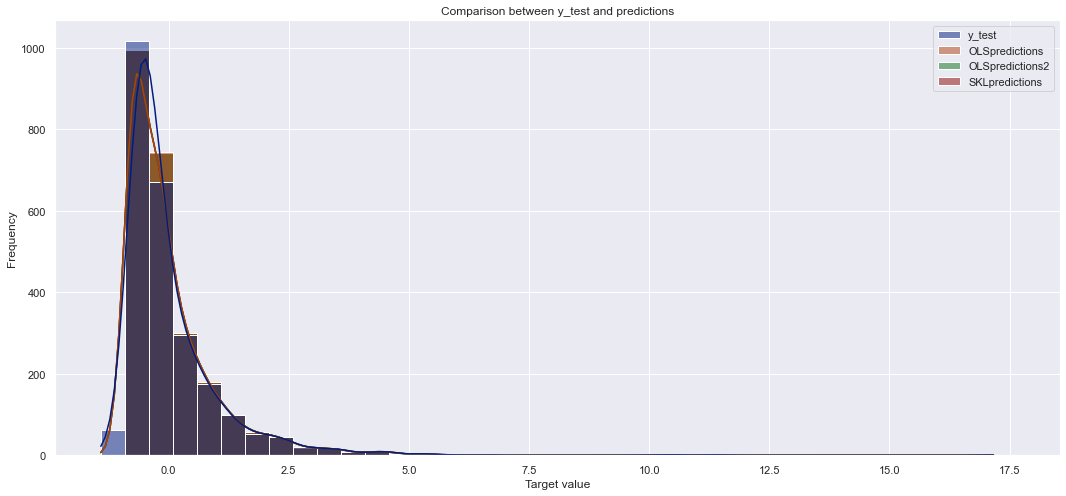

In [39]:
# Let's plot the predictions
fig06 = sns.histplot(data=comparison_df, binwidth=0.5, kde=True)
plt.title('Comparison between y_test and predictions')
plt.xlabel('Target value')
plt.ylabel('Frequency')
plt.show()
fig06.figure.savefig(r'Plots\Fig06_Comparison_between__y_test__and_predictions.png')

As we can see in the previous plot, the predictions are very similar to the y_tests values, so we have a good model using linear regresion (in fact, the predictions with the OLS method adding a constant are the same as the model with ScikitLearn)

### - Exercici 2:
Compara’ls en base al MSE i al R2

In [40]:
print(mseOLS,rmseOLS,OLSRsquared)
print(mseOLS2,rmseOLS2, OLS2Rsquared)
print(mseSKL,rmseSKL,SKLRsquared)

from prettytable import PrettyTable
t = PrettyTable(['Method', 'MSE', 'RMSE', 'R-Squared'])
t.add_row(['Linear Regression: OLS without constant', mseOLS, rmseOLS, OLSRsquared])
t.add_row(['Linear Regression: OLS with constant', mseOLS2, rmseOLS2, OLS2Rsquared])
t.add_row(['Linear Regression: Sklearn', mseSKL,rmseSKL,SKLRsquared])
print(t)


0.0077535469985712405 0.0880542276019229 0.9911531463118488
0.007841512169802842 0.08855231318154734 0.9906716719750495
0.007841512169802844 0.08855231318154734 0.9906716719750495


### - Exerici 3: 
Entrena’ls utilitzant els diferents paràmetres que admeten.

### - Exercici 4:
Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

## Nivell 2

### - Exercici 5:
Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

## Nivell 3

### - Exercici 6:
No utilitzis la variable DepDelay a l’hora de fer prediccions